   Unnamed: 0    QKEY INTERVIEW_START_W99   INTERVIEW_END_W99 DEVICE_TYPE_W99  \
0           0  100260 2021-11-03 14:25:27 2021-11-03 14:45:34       Laptop/PC   
1           1  100314 2021-11-04 12:35:35 2021-11-04 12:55:29      Smartphone   
2           2  100363 2021-11-03 20:23:43 2021-11-03 20:36:24      Smartphone   
3           3  100598 2021-11-02 13:01:05 2021-11-04 12:37:42       Laptop/PC   
4           4  100637 2021-11-02 12:32:58 2021-11-02 12:46:23       Laptop/PC   

  LANG_W99 FORM_W99    XTABLET_W99        TECH1_W99  \
0  English   Form 2  Non-tablet HH              NaN   
1  English   Form 1  Non-tablet HH  Mostly positive   
2  English   Form 1  Non-tablet HH  Mostly positive   
3  English   Form 2  Non-tablet HH              NaN   
4  English   Form 2  Non-tablet HH              NaN   

                               SC1_W99  ...       F_PARTYLN_FINAL  \
0                      Mostly positive  ...                   NaN   
1                                  NaN  ... 

/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_11404/477199501.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.replace("Refused", pd.NA, inplace=True)
/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_11404/477199501.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.dropna(inplace=True)
/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_11404/477199501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

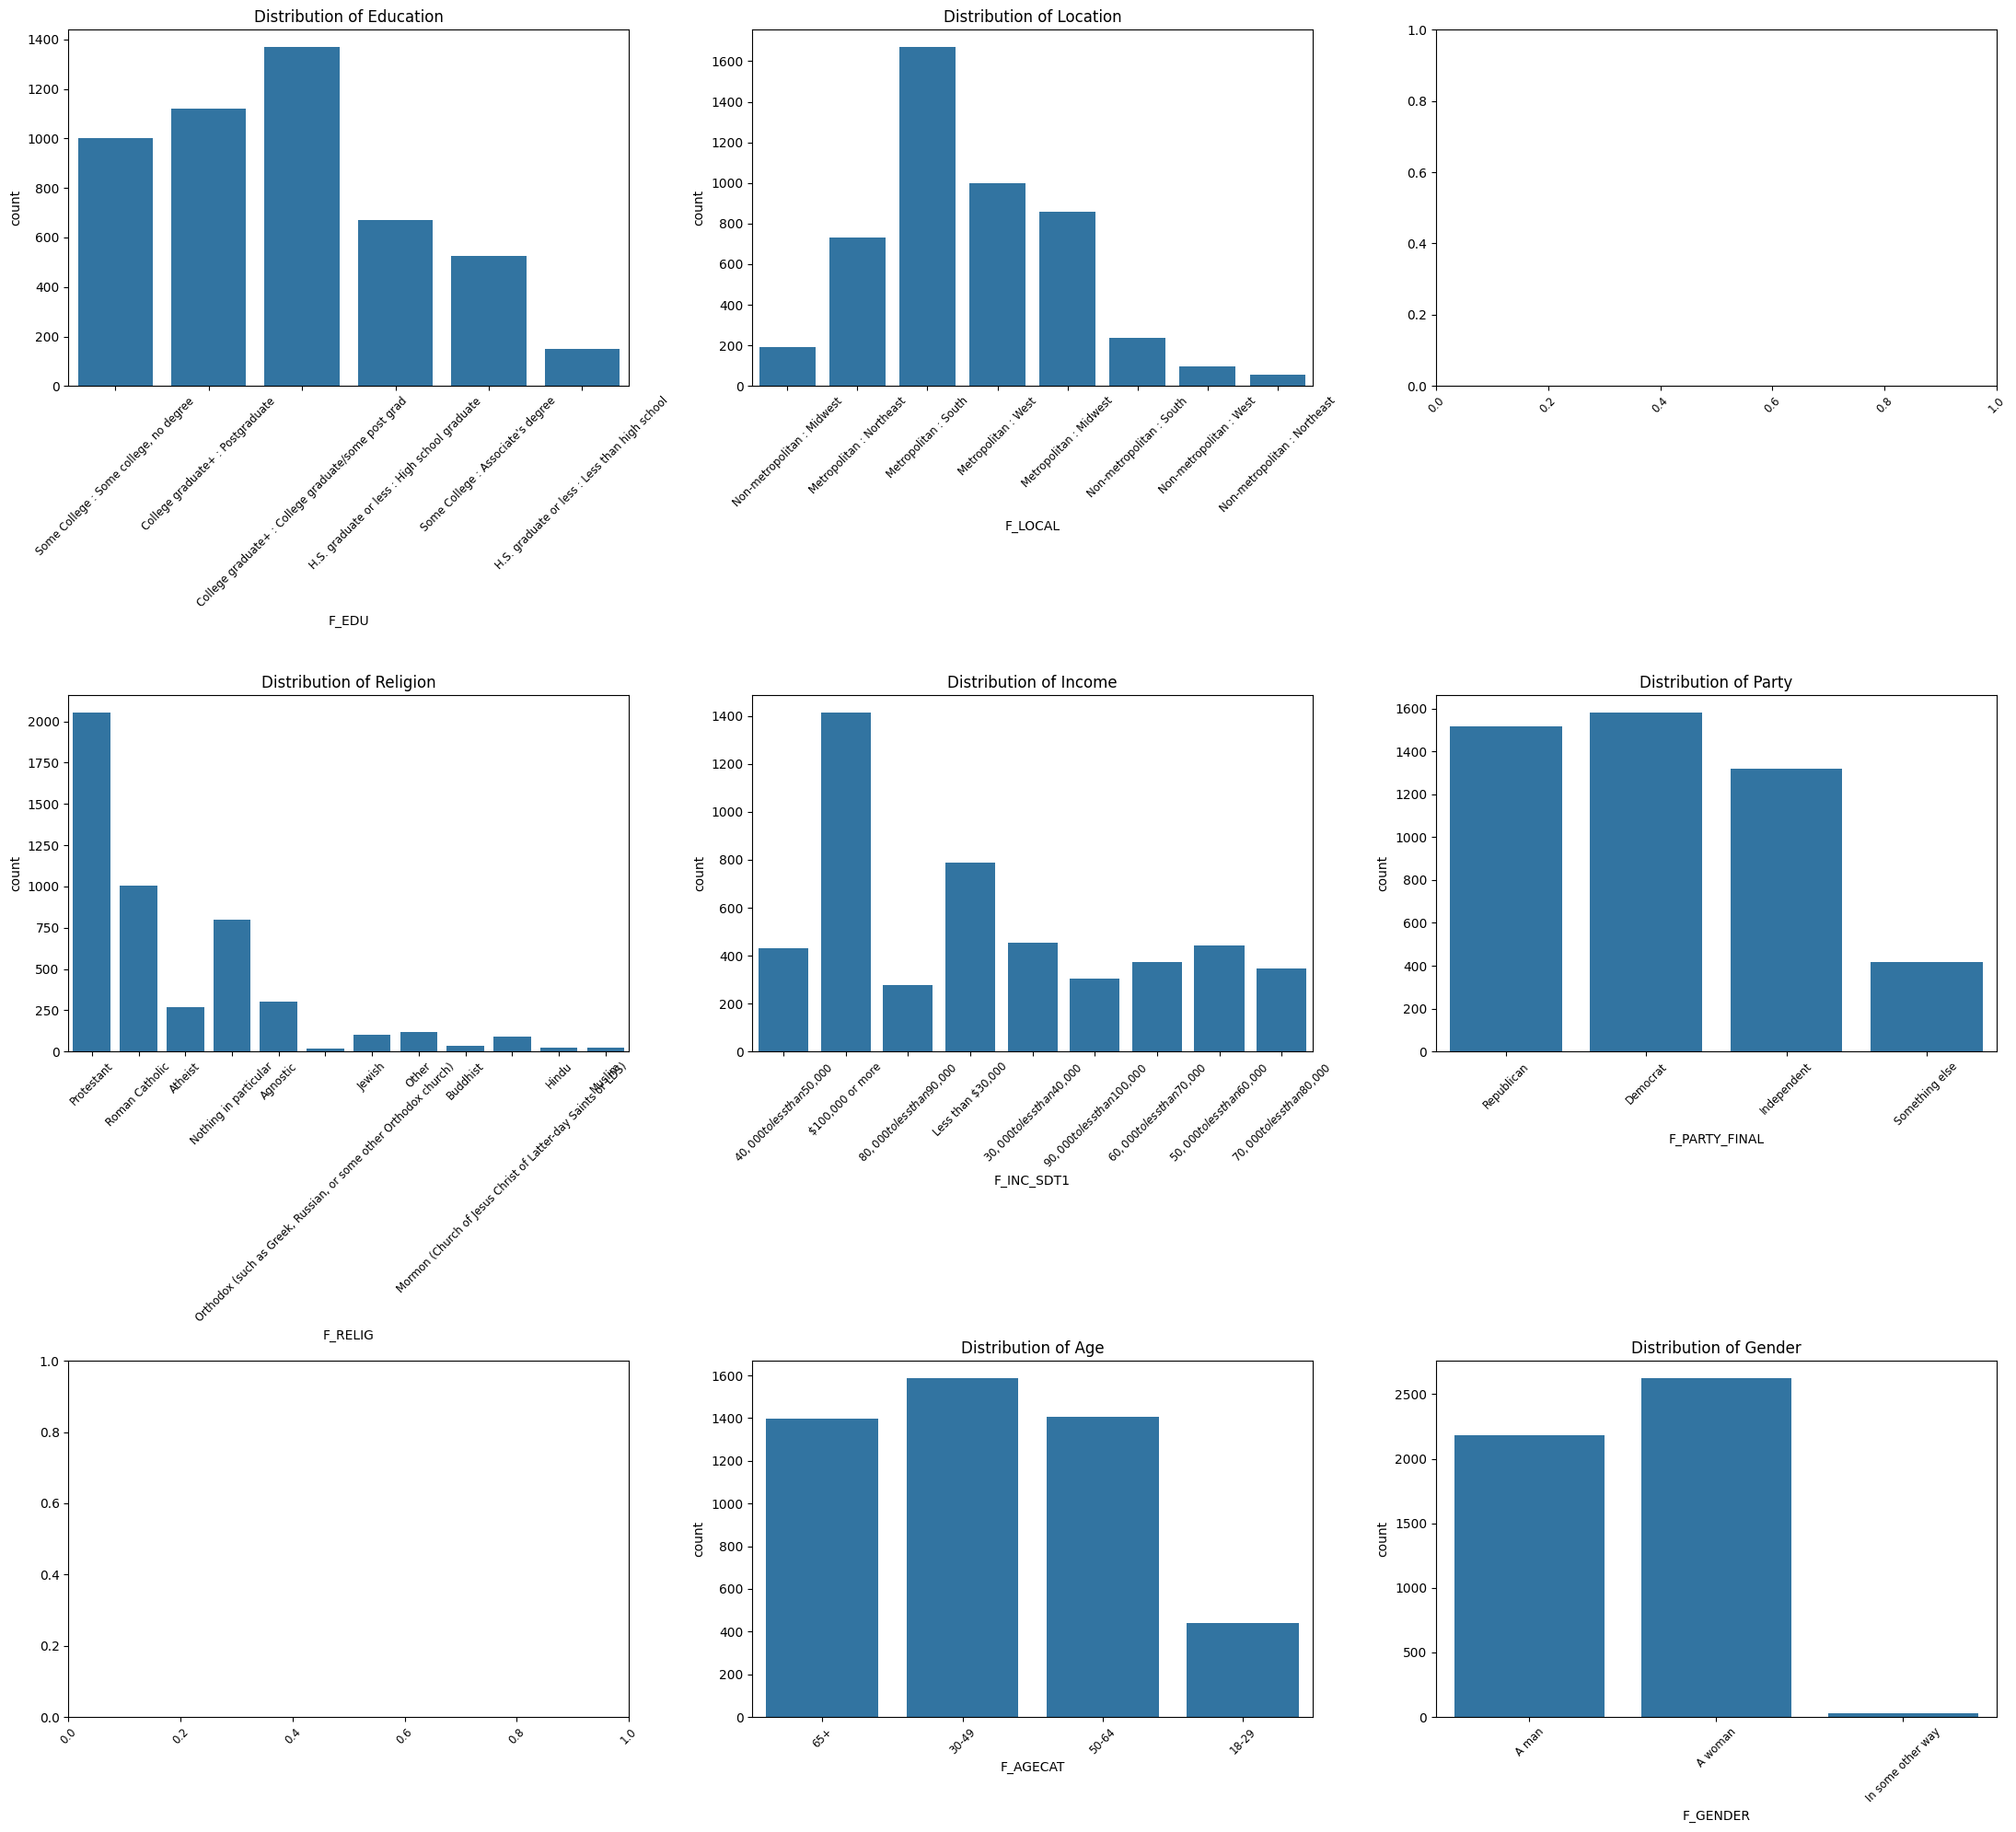

NaN values in X_train: 0
NaN values in X_test: 0
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 0.5928361022740661
Random Forest Model Performance with Best Parameters:
Accuracy: 0.5813449023861171
F1 Score: 0.505112701095111
Precision: 0.5003865553006625
Recall: 0.5813449023861171


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# 读取数据
df = pd.read_excel('/Users/Owner/Desktop/AI-Human-PewData.xlsx')

# 显示前五行
print(df.head())

# 选择需要的列
predictors = ['F_METRO', 'F_CREGION', 'F_AGECAT', 'F_GENDER', 'F_EDUCCAT', 'F_EDUCCAT2', 'F_RELIG', 'F_PARTY_FINAL', 'F_INC_SDT1']
outcome = 'SMALG2_W99'
c_df = df.iloc[0:10260]

X = c_df[predictors]
y = c_df[outcome]
clean_df = c_df[predictors + [outcome]]

# 替换"Refused"为NaN，并删除包含NaN的行
clean_df.replace("Refused", pd.NA, inplace=True)
clean_df.dropna(inplace=True)

# 合并相关列
clean_df["F_EDU"] = clean_df['F_EDUCCAT'] + ' : ' + clean_df['F_EDUCCAT2']
clean_df['F_LOCAL'] = clean_df['F_METRO'] + ' : ' + clean_df['F_CREGION']

# 显示前五行
print(clean_df.head())

# 画柱状图
fig, axes = plt.subplots(3, 3, figsize=(22, 20))
sns.countplot(x='F_EDU', data=clean_df, ax=axes[0, 0]).set_title('Distribution of Education')
sns.countplot(x='F_LOCAL', data=clean_df, ax=axes[0, 1]).set_title('Distribution of Location')
sns.countplot(x='F_RELIG', data=clean_df, ax=axes[1, 0]).set_title('Distribution of Religion')
sns.countplot(x='F_INC_SDT1', data=clean_df, ax=axes[1, 1]).set_title('Distribution of Income')
sns.countplot(x='F_PARTY_FINAL', data=clean_df, ax=axes[1, 2]).set_title('Distribution of Party')
sns.countplot(x='F_AGECAT', data=clean_df, ax=axes[2, 1]).set_title('Distribution of Age')
sns.countplot(x='F_GENDER', data=clean_df, ax=axes[2, 2]).set_title('Distribution of Gender')

for ax in axes.flat:
    ax.tick_params(axis='x', labelrotation=45, labelsize='small')

plt.tight_layout()
plt.show()

# 定义需要进行 One-Hot 编码的列
pre = ['F_EDU', 'F_RELIG', 'F_PARTY_FINAL']

# 使用 OneHotEncoder 进行编码
encoder = OneHotEncoder(drop='first', sparse_output=False)
preprocessed_data = encoder.fit_transform(clean_df[pre])

# 获取编码后的特征名称
encoded_feature_names = encoder.get_feature_names_out(pre)

# 将编码后的数据转换为 DataFrame
preprocessed_df = pd.DataFrame(preprocessed_data, columns=encoded_feature_names)

# 将目标变量添加到编码后的 DataFrame 中
preprocessed_df['SMALG2_W99'] = clean_df['SMALG2_W99']

# 检查 NaN 值并处理
if preprocessed_df.isnull().sum().any():
    preprocessed_df = preprocessed_df.dropna()

# 定义预测变量和目标变量
X = preprocessed_df.drop('SMALG2_W99', axis=1)
y = preprocessed_df['SMALG2_W99']

# 将目标变量转换为二元变量
y = y.apply(lambda x: 1 if x == 'Good idea for society' else 0)

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 检查训练和测试数据中是否存在 NaN 值
print(f"NaN values in X_train: {X_train.isnull().sum().sum()}")
print(f"NaN values in X_test: {X_test.isnull().sum().sum()}")

# 定义模型和参数网格
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 使用 GridSearchCV 进行超参数调优
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 打印最佳参数和最佳得分
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

# 使用最佳参数进行预测
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 打印性能指标
print("Random Forest Model Performance with Best Parameters:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")


In [10]:
# 定义模型管道，并添加 OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('edu', OneHotEncoder(handle_unknown='ignore'), ['F_EDU']),
        ('party', OneHotEncoder(handle_unknown='ignore'), ['F_PARTY_FINAL']),
        ('religion', OneHotEncoder(handle_unknown='ignore'), ['F_RELIG'])
    ]
)

# Logistic Regression
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

logreg_param_grid = {
    'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'classifier__max_iter': [100, 200, 300, 500],
    'classifier__l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}

grid_search_logreg = GridSearchCV(logreg_pipeline, logreg_param_grid, scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)

print(f'Best Params for Logistic Regression: {grid_search_logreg.best_params_}')
logreg_best = grid_search_logreg.best_estimator_

# 使用最佳参数进行预测
y_pred_logreg = logreg_best.predict(X_test)

# 打印性能指标
print("Logistic Regression Model Performance with Best Parameters:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(f"F1 Score: {f1_score(y_test, y_pred_logreg, average='weighted')}")
print(f"Precision: {precision_score(y_test, y_pred_logreg, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_logreg, average='weighted')}")

# K-Nearest Neighbors
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(knn_pipeline, knn_param_grid, scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

print(f'Best Params for K-Nearest Neighbors: {grid_search_knn.best_params_}')
knn_best = grid_search_knn.best_estimator_

# 使用最佳参数进行预测
y_pred_knn = knn_best.predict(X_test)

# 打印性能指标
print("K-Nearest Neighbors Model Performance with Best Parameters:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn, average='weighted')}")

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


ValueError: 
All the 10000 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10000 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'F_EDU'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_indexing.py", line 361, in _get_column_indices
    col_idx = all_columns.get_loc(col)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/pandas/core/indexes/base.py", line 3812, in get_loc
    raise KeyError(key) from err
KeyError: 'F_EDU'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/pipeline.py", line 406, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/pipeline.py", line 1310, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_set_output.py", line 313, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/compose/_column_transformer.py", line 968, in fit_transform
    self._validate_column_callables(X)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/compose/_column_transformer.py", line 536, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_indexing.py", line 369, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


In [11]:
# 定义模型管道，并添加 OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('edu', OneHotEncoder(handle_unknown='ignore'), ['F_EDU']),
        ('party', OneHotEncoder(handle_unknown='ignore'), ['F_PARTY_FINAL']),
        ('religion', OneHotEncoder(handle_unknown='ignore'), ['F_RELIG'])
    ]
)

# Logistic Regression
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

logreg_param_grid = {
    'classifier__penalty': ['l1', 'l2', 'none'],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'classifier__max_iter': [100, 200, 300, 500]
}

grid_search_logreg = GridSearchCV(logreg_pipeline, logreg_param_grid, scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)

print(f'Best Params for Logistic Regression: {grid_search_logreg.best_params_}')
logreg_best = grid_search_logreg.best_estimator_

# 使用最佳参数进行预测
y_pred_logreg = logreg_best.predict(X_test)

# 打印性能指标
print("Logistic Regression Model Performance with Best Parameters:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(f"F1 Score: {f1_score(y_test, y_pred_logreg, average='weighted')}")
print(f"Precision: {precision_score(y_test, y_pred_logreg, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_logreg, average='weighted')}")

# K-Nearest Neighbors
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(knn_pipeline, knn_param_grid, scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

print(f'Best Params for K-Nearest Neighbors: {grid_search_knn.best_params_}')
knn_best = grid_search_knn.best_estimator_

# 使用最佳参数进行预测
y_pred_knn = knn_best.predict(X_test)

# 打印性能指标
print("K-Nearest Neighbors Model Performance with Best Parameters:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn, average='weighted')}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='weighted')}")

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


ValueError: 
All the 1500 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1500 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'F_EDU'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_indexing.py", line 361, in _get_column_indices
    col_idx = all_columns.get_loc(col)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/pandas/core/indexes/base.py", line 3812, in get_loc
    raise KeyError(key) from err
KeyError: 'F_EDU'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/pipeline.py", line 406, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/pipeline.py", line 1310, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_set_output.py", line 313, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/compose/_column_transformer.py", line 968, in fit_transform
    self._validate_column_callables(X)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/compose/_column_transformer.py", line 536, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_indexing.py", line 369, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# 读取数据
df = pd.read_excel('/Users/Owner/Desktop/AI-Human-PewData.xlsx')

# 显示前五行
print(df.head())

# 选择需要的列
predictors = ['F_METRO', 'F_CREGION', 'F_AGECAT', 'F_GENDER', 'F_EDUCCAT', 'F_EDUCCAT2', 'F_RELIG', 'F_PARTY_FINAL', 'F_INC_SDT1']
outcome = 'SMALG2_W99'
c_df = df.iloc[0:10260]

X = c_df[predictors]
y = c_df[outcome]
clean_df = c_df[predictors + [outcome]]

# 替换"Refused"为NaN，并删除包含NaN的行
clean_df.replace("Refused", pd.NA, inplace=True)
clean_df.dropna(inplace=True)

# 合并相关列
clean_df["F_EDU"] = clean_df['F_EDUCCAT'] + ' : ' + clean_df['F_EDUCCAT2']
clean_df['F_LOCAL'] = clean_df['F_METRO'] + ' : ' + clean_df['F_CREGION']

# 显示前五行
print(clean_df.head())

# 定义需要进行 One-Hot 编码的列
pre = ['F_EDU', 'F_RELIG', 'F_PARTY_FINAL']

# 使用 OneHotEncoder 进行编码
encoder = OneHotEncoder(drop='first', sparse_output=False)
preprocessed_data = encoder.fit_transform(clean_df[pre])

# 获取编码后的特征名称
encoded_feature_names = encoder.get_feature_names_out(pre)

# 将编码后的数据转换为 DataFrame
preprocessed_df = pd.DataFrame(preprocessed_data, columns=encoded_feature_names)

# 将目标变量添加到编码后的 DataFrame 中
preprocessed_df['SMALG2_W99'] = clean_df['SMALG2_W99']

# 检查 NaN 值并处理
if preprocessed_df.isnull().sum().any():
    preprocessed_df = preprocessed_df.dropna()

# 定义预测变量和目标变量
X = preprocessed_df.drop('SMALG2_W99', axis=1)
y = preprocessed_df['SMALG2_W99']

# 将目标变量转换为二元变量
y = y.apply(lambda x: 1 if x == 'Good idea for society' else 0)

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 检查训练和测试数据中是否存在 NaN 值
print(f"NaN values in X_train: {X_train.isnull().sum().sum()}")
print(f"NaN values in X_test: {X_test.isnull().sum().sum()}")

# 定义模型和参数网格
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 使用 GridSearchCV 进行超参数调优
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 打印最佳参数和最佳得分
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

# 使用最佳参数进行预测
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 打印性能指标
print("Random Forest Model Performance with Best Parameters:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")

# 对其他模型进行超参数调优和评估

# 定义模型管道，并添加 OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('edu', OneHotEncoder(handle_unknown='ignore'), ['F_EDU']),
        ('party', OneHotEncoder(handle_unknown='ignore'), ['F_PARTY_FINAL']),
        ('religion', OneHotEncoder(handle_unknown='ignore'), ['F_RELIG'])
    ]
)

# Logistic Regression
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

logreg_param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [100, 200, 300, 500]
}

grid_search_logreg = GridSearchCV(logreg_pipeline, logreg_param_grid, scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)

print(f'Best Params for Logistic Regression: {grid_search_logreg.best_params_}')
logreg_best = grid_search_logreg.best_estimator_

# 使用最佳参数进行预测
y_pred_logreg = logreg_best.predict(X_test)

# 打印性能指标
print("Logistic Regression Model Performance with Best Parameters:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(f"F1 Score: {f1_score(y_test, y_pred_logreg, average='weighted')}")
print(f"Precision: {precision_score(y_test, y_pred_logreg, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_logreg, average='weighted')}")

# K-Nearest Neighbors
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(knn_pipeline, knn_param_grid, scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

print(f'Best Params for K-Nearest Neighbors: {grid_search_knn.best_params_}')
knn_best = grid_search_knn.best_estimator_

# 使用最佳参数进行预测
y_pred_knn = knn_best.predict(X_test)

# 打印性能指标
print("K-Nearest Neighbors Model Performance with Best Parameters:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn, average='weighted')}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='weighted')}")


   Unnamed: 0    QKEY INTERVIEW_START_W99   INTERVIEW_END_W99 DEVICE_TYPE_W99  \
0           0  100260 2021-11-03 14:25:27 2021-11-03 14:45:34       Laptop/PC   
1           1  100314 2021-11-04 12:35:35 2021-11-04 12:55:29      Smartphone   
2           2  100363 2021-11-03 20:23:43 2021-11-03 20:36:24      Smartphone   
3           3  100598 2021-11-02 13:01:05 2021-11-04 12:37:42       Laptop/PC   
4           4  100637 2021-11-02 12:32:58 2021-11-02 12:46:23       Laptop/PC   

  LANG_W99 FORM_W99    XTABLET_W99        TECH1_W99  \
0  English   Form 2  Non-tablet HH              NaN   
1  English   Form 1  Non-tablet HH  Mostly positive   
2  English   Form 1  Non-tablet HH  Mostly positive   
3  English   Form 2  Non-tablet HH              NaN   
4  English   Form 2  Non-tablet HH              NaN   

                               SC1_W99  ...       F_PARTYLN_FINAL  \
0                      Mostly positive  ...                   NaN   
1                                  NaN  ... 

/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_11404/3909307311.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.replace("Refused", pd.NA, inplace=True)
/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_11404/3909307311.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.dropna(inplace=True)
/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_11404/3909307311.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 0.5928361022740661
Random Forest Model Performance with Best Parameters:
Accuracy: 0.5813449023861171
F1 Score: 0.505112701095111
Precision: 0.5003865553006625
Recall: 0.5813449023861171
Fitting 5 folds for each of 80 candidates, totalling 400 fits


ValueError: 
All the 400 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'F_EDU'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_indexing.py", line 361, in _get_column_indices
    col_idx = all_columns.get_loc(col)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/pandas/core/indexes/base.py", line 3812, in get_loc
    raise KeyError(key) from err
KeyError: 'F_EDU'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/pipeline.py", line 406, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/pipeline.py", line 1310, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_set_output.py", line 313, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/compose/_column_transformer.py", line 968, in fit_transform
    self._validate_column_callables(X)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/compose/_column_transformer.py", line 536, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_indexing.py", line 369, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe
